In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_breast_cancer


In [2]:
cancer = load_breast_cancer(as_frame=True)


In [3]:
df = cancer.frame

In [4]:
print('Original Dataframe shape :',df.shape)

Original Dataframe shape : (569, 31)


In [6]:
X = df[cancer['feature_names']]
print('Inputs Dataframe shape :', X.shape)

Inputs Dataframe shape : (569, 30)


In [7]:
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

In [8]:
X_mean,X_std,Z

(mean radius                 14.127292
 mean texture                19.289649
 mean perimeter              91.969033
 mean area                  654.889104
 mean smoothness              0.096360
 mean compactness             0.104341
 mean concavity               0.088799
 mean concave points          0.048919
 mean symmetry                0.181162
 mean fractal dimension       0.062798
 radius error                 0.405172
 texture error                1.216853
 perimeter error              2.866059
 area error                  40.337079
 smoothness error             0.007041
 compactness error            0.025478
 concavity error              0.031894
 concave points error         0.011796
 symmetry error               0.020542
 fractal dimension error      0.003795
 worst radius                16.269190
 worst texture               25.677223
 worst perimeter            107.261213
 worst area                 880.583128
 worst smoothness             0.132369
 worst compactness       

In [9]:
c = Z.cov()

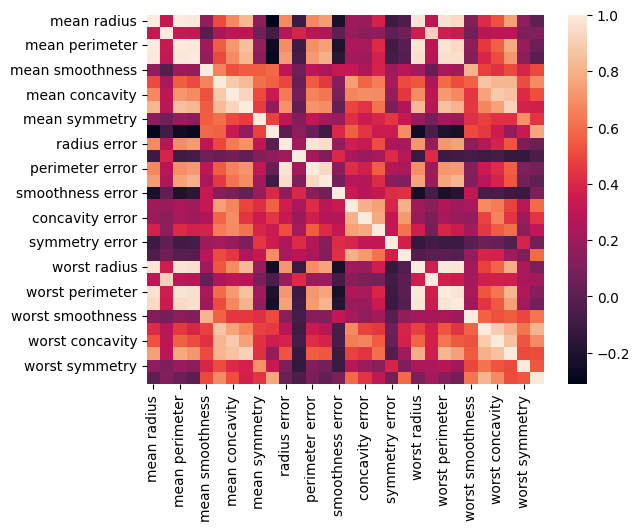

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.heatmap(c)
plt.show()

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [14]:
idx = eigenvalues.argsort()[::-1]

In [15]:
 eigenvalues = eigenvalues[idx]

In [16]:
 eigenvectors = eigenvectors[:,idx]

In [18]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues) 
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [20]:
n_components = np.argmax(explained_var >= 0.50) + 1 
n_components

np.int64(2)

In [21]:
u = eigenvectors[:,:n_components]


In [22]:
pca_component = pd.DataFrame(u, index = cancer['feature_names'], columns = ['PC1','PC2'] )

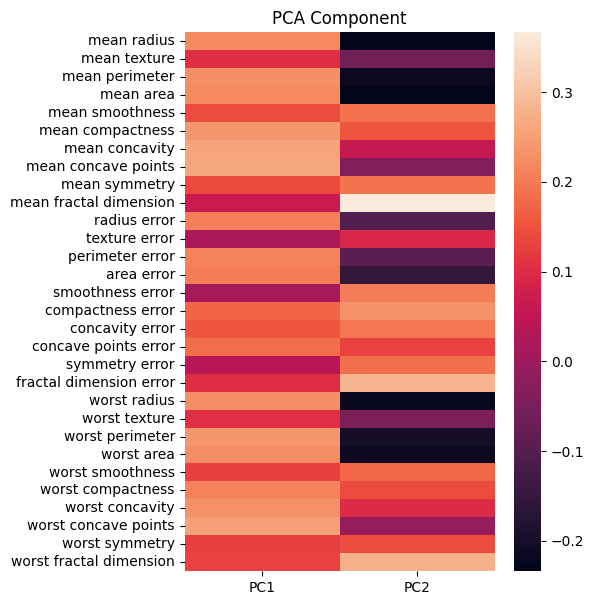

In [23]:
plt.figure(figsize =(5, 7)) 
sns.heatmap(pca_component) 
plt.title('PCA Component') 
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn import datasets

In [25]:
dataset=datasets.load_iris()

In [26]:
X=dataset['data']
y=dataset['target']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [29]:

pca=PCA(n_components=3)
pca

PCA(n_components=3)

In [30]:
X_train=pca.fit_transform(X_train)
X_train

array([[ 3.22902397e-01, -2.37270677e-01,  5.67385995e-02],
       [ 3.35552035e+00,  5.83049683e-01, -3.28026023e-01],
       [ 6.06909989e-01, -3.15971948e-01,  3.00676488e-01],
       [-2.72817511e+00,  4.27577132e-01,  1.15313718e-03],
       [ 3.45649511e+00,  5.05276379e-01, -5.58623842e-01],
       [ 1.81648425e-01, -2.53524117e-01, -2.95111131e-01],
       [-2.68432386e+00,  4.26081277e-01, -1.16106065e-01],
       [-2.81519461e+00,  3.65984714e-01,  1.04618538e-01],
       [-2.24998893e+00,  5.19074070e-01,  3.29384000e-01],
       [-5.78277826e-01, -1.17473663e+00, -3.43091299e-01],
       [ 1.33493144e+00, -1.58668543e-01, -7.85684488e-02],
       [-2.40366776e+00,  5.99469498e-02,  1.25799777e-01],
       [-2.55890034e+00, -2.63787007e-02, -2.52131368e-01],
       [-2.35087676e+00,  1.95931613e-01,  5.58985862e-02],
       [ 2.99984039e-01, -4.44823406e-01, -1.67008263e-02],
       [-2.63556736e+00,  3.39217011e-01, -5.69862980e-02],
       [ 2.80440519e-01, -1.55505144e-01

In [31]:
X_test=pca.transform(X_test)
X_test

array([[ 8.70040853e-01, -1.15509142e-01, -2.49664892e-01],
       [-2.23549168e+00,  9.77633301e-01, -5.88266880e-02],
       [ 3.74816334e+00,  2.92308120e-01, -5.09305167e-01],
       [ 7.61382105e-01, -1.12906783e-01,  2.23383067e-02],
       [ 1.28475481e+00,  3.18957299e-01, -5.09690705e-01],
       [-2.45397801e+00,  5.19612686e-01, -1.07666913e-01],
       [-2.27751928e-01, -1.93394122e-01,  7.78709474e-02],
       [ 1.87694410e+00,  4.31417060e-01,  1.40387888e-01],
       [ 8.83972768e-01, -4.64312798e-01, -5.30011145e-01],
       [ 8.13566829e-02, -2.40334940e-01, -1.95566316e-01],
       [ 1.61601925e+00,  2.64599911e-01,  2.53128524e-01],
       [-2.83939206e+00, -1.13315521e-01, -2.10798113e-01],
       [-2.66631075e+00,  7.19002418e-01, -2.19045609e-01],
       [-2.72386596e+00,  5.87708626e-03, -1.95498122e-01],
       [-2.62799364e+00,  6.05865783e-01,  2.52477721e-01],
       [ 1.05083692e+00,  3.20948488e-01,  1.81576895e-01],
       [ 2.30035383e+00, -2.96719778e-02

In [32]:
pca.components_

array([[ 0.36873621, -0.06977632,  0.85630117,  0.35484246],
       [ 0.68187006,  0.69682861, -0.1867726 , -0.12082672],
       [-0.53692993,  0.63566209,  0.05426774,  0.55199182]])

In [33]:
pca.explained_variance_ratio_

array([0.9201008 , 0.05494812, 0.01978256])

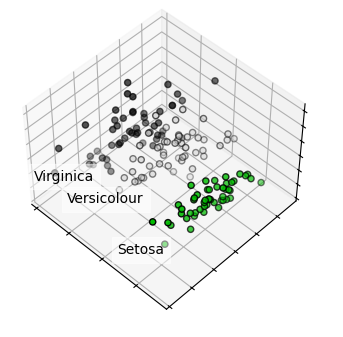

In [34]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()